In [1]:
import pandas as pd
import numpy as np


# Load the data into a DataFrame
insurance_data_path = "insurance.csv"
df = pd.read_csv(insurance_data_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [2]:
# Task #1 Cleaning the data

## drop the rows with missing values
df.dropna(inplace=True) 
## converting datatypes
df["age"] = df["age"].astype(int)
df["children"] = df["children"].astype(int)
df['smoker'] = df['smoker'].map({'no': False, 'yes': True})  #df['smoker'] = df['smoker'] == 'yes'
df["smoker"] = df["smoker"].astype(bool)
## standartize the region column to First letter capital
df["region"] = df["region"].str.capitalize() 
## standardize the sex column
Female = 'F'
Male = 'M'
df["sex"] = df["sex"].map({"F": Female, "M": Male, "female": Female, "woman": Female, "male": Male, "man": Male})
## convert the charges column to float
df["charges"] = df["charges"].str.replace("$", "").str.replace(",", "").astype(float)
## convert all columns to positive values
df = df.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1207 non-null   int64  
 1   sex       1207 non-null   object 
 2   bmi       1207 non-null   float64
 3   children  1207 non-null   int64  
 4   smoker    1207 non-null   bool   
 5   region    1207 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 67.2+ KB


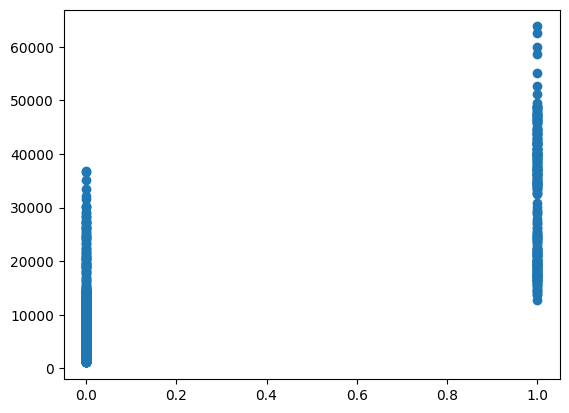

In [3]:
# Task #2 Scatterplots of relationships between variables and 'charges'
import matplotlib.pyplot as plt

plt.scatter(df["smoker"], df["charges"])




In [4]:
# Task #3 Prepare the data for regression model fitting
regression_data = df.copy()
# get dummies for the region column
regression_data = pd.get_dummies(regression_data, columns=["region"], drop_first=True)
# convert "smoker" to a int
regression_data["smoker"] = regression_data["smoker"].astype("Int64")
# convert "sex" column to a int
regression_data["is_male"] = (regression_data["sex"] == "M").astype("Int64")
regression_data.drop(columns = "sex", inplace=True)

regression_data.head()

,age,bmi,children,smoker,charges,region_Northwest,region_Southeast,region_Southwest,is_male
0,19,27.900,0,1,16884.92400,False,False,True,0
1,18,33.770,1,0,1725.55230,False,True,False,1
2,28,33.000,3,0,4449.46200,False,True,False,1
3,33,22.705,0,0,21984.47061,True,False,False,1
4,32,28.880,0,0,3866.85520,True,False,False,1


In [5]:
# Task #4 Fit a linear regression model to the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define input and output variables
X = regression_data.drop(columns=["charges"])
Y = regression_data["charges"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate the R-squared score
r2_score = r2_score(Y_test, Y_pred)

# Output the R-squared score
r2_score


0.7049323160872816

In [6]:
def preprocess_df(df):
    regression_data = df.copy()
    regression_data["region"] = regression_data["region"].str.capitalize()
    regression_data = pd.get_dummies(regression_data, columns=["region"], drop_first=True)

    regression_data['smoker'] = regression_data['smoker'] == 'yes'
    regression_data["smoker"] = regression_data["smoker"].astype("Int64")

    regression_data["is_male"] = (regression_data["sex"] == "M").astype("Int64")
    regression_data.drop(columns = "sex", inplace=True)
    return regression_data

In [7]:
# Task #5 see how model performs on valiidation dataset
# Create helper function to preprocess dataframe
val_df = pd.read_csv("validation_dataset.csv")

input_df = preprocess_df(val_df)
predictions = model.predict(input_df)

validation_data = val_df.copy()
validation_data["predicted_charges"] = predictions   
validation_data.loc[validation_data["predicted_charges"] < 1000, "predicted_charges"] = 1000  

In [8]:
#df.sample(15)
validation_data

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,31278.649292
2,27.0,male,29.150000,0.0,yes,southeast,28121.844192
3,71.0,male,65.502135,13.0,yes,southeast,57516.849389
4,28.0,male,38.060000,0.0,no,southeast,7007.860897
5,70.0,female,72.958351,11.0,yes,southeast,58677.838443
6,29.0,female,32.110000,2.0,no,northwest,7044.405963
7,42.0,female,41.325000,1.0,no,northeast,13065.658004
8,48.0,female,36.575000,0.0,no,northwest,12665.703636
9,63.0,male,33.660000,3.0,no,southeast,16464.975669
